Episode: 900
Score over time: 81.455
[[  8.82373     14.0339       5.176611     8.82373   ]
 [  8.82373    -10.          -9.9999998   -2.89282844]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 14.0339      21.477      -10.           8.82373   ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 21.477       32.11       -10.          14.0339    ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 32.10999995  32.11        47.3         21.477     ]
 [ 32.10999563  47.29999992  69.         -10.        ]
 [ 47.2999995   69.         100.         -10.        ]
 [  0.           0.           0.           0.        ]]
**********************************************************
EPISODE  0
[[  8.82373 

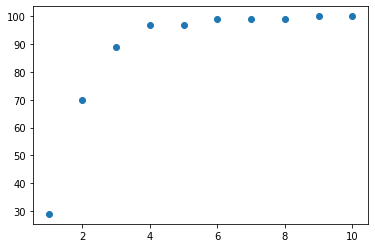

Movimientos por repeticion


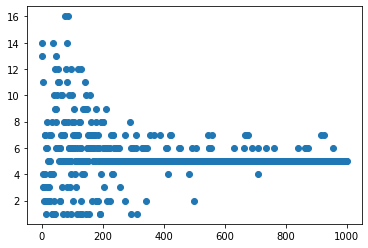

Training finished.



In [13]:
#FROZEN LAKE GAME [Q LEARNING]

import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import random
from IPython.display import clear_output
import time
import gymLake as gymlocal
import matplotlib.pyplot as plt
# --ENVIRONMENT CREATION--
#env = gym.make("FrozenLake-v0")
random_map = generate_random_map(size=4, p=0.8)
env = gymlocal.FrozenLakeEnv(desc=random_map)
# --Q-TABLE INITIALISATION--
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
#print(qtable)
#print("action_size: ", action_size)
#print("state_size: ", state_size)

# --HYPERPARAMETERS--
total_episodes = 1000		# Total episodes
learning_rate = 0.8 		# Learning rate
max_steps = 99				# Max steps per episode
gamma = 0.7 				# Discounting rate

# Exploration parameters
epsilon = 0.1				# Exploration rate
max_epsilon = 1.0 			# Exploration probability at start
min_epsilon = 0.01			# Min exploration probability
decay_rate = 0.01			# Exponential decay rate for exploration probability
y=[]
yy=[]

# --Q-LEARNING ALGORITHM--
rewards = [] # List of rewards

for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 # Total rewards obtained in the episode

    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0,1)
        if exp_exp_tradeoff > epsilon:
            # Exploitation --> taking the biggest Q-value for this state
            action = np.argmax(qtable[state, :])
        else:
            # Exploration
            action = env.action_space.sample()

        
        # Take the action (a) and observe the outcome state (s') and reward(r')
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [reward + gamma * max Q(s',a) - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new_state (s')
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Move to new state
        state = new_state
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.01)'''
        
        
        
        # If done (agent died) --> finish episode
        if done:
            break
    
    if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
    episode += 1
    if(reward < 0):
        y.append(0)
    else:
        y.append(1)
    
    yy.append(step)

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print("Score over time: " + str(sum(rewards)/total_episodes))
print(qtable)



# Play Frozen Lake!

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("**********************************************************")
    print("EPISODE ", episode)
    print(qtable)
    for step in range(max_steps):
        env.render()
        # Take the action (index) that has the maximum expected future reward given that state
        action = np.argmax(qtable[state, :])

        new_state, reward, done, info = env.step(action)
        print('reward: ', reward)
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.1)'''
        if done:
            break

        state = new_state
    


#Grafica-----------------------------------------------------------------------------------------------------------
#print('x: ', len(x), ' y: ', len(y))
cont = 1
lenthx = 0
porcentage = 0
porcentagey = []
for i in y:
    porcentage += i
    if(cont%100 == 0):
        porcentagey.append(porcentage)
        porcentage = 0
        cont=0
        lenthx +=1

    cont+=1

print("Fallos por repeticion")
x = list(range(1, total_episodes+1))
porcentagex = list(range(1, lenthx+1))
#print('x: ', len(porcentagex), ' y: ', len(porcentagey))
fig, ax = plt.subplots()
#ax.scatter(x, y)
ax.scatter(porcentagex, porcentagey)
plt.show()
print("Movimientos por repeticion")


fig, ax = plt.subplots()
ax.scatter(x, yy)
plt.show()
print("Training finished.\n")
#------------------------------------------------------------------------------------------------------------


env.close()